In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [59]:
Grab_MM_1 = pd.read_csv('GRAB_MMclosed_open_session1.csv')

/var/folders/j0/v9b_1b8d44l7jr8z9bvwrg4h0000gp/T/ipykernel_51466/3915672200.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  Grab_MM_1 = pd.read_csv('GRAB_MMclosed_open_session1.csv')


In [60]:
# Chaning event name to halt and making it so that its True when there is a halt
Grab_MM_1.loc[:, 'event'] = Grab_MM_1['event'].replace({False: True, True: False})
Grab_MM_1.rename(columns = {'event': 'halt'})

,Seconds,470_dfF,movementX,movementY,halt,ExperimentEvents,Experiment,Session,mouseID,sex,area,No_halt,LinearMismatch_block,LinearPlaybackMismatch_block
0,0.000,0.000010,0.000000,-1.593317e-03,True,NaN,MMclosed-and-open,day1,B2M6,M,V2M,False,False,False
1,0.001,0.000034,0.000000,-5.134020e-03,True,NaN,MMclosed-and-open,day1,B2M6,M,V2M,False,False,False
2,0.002,0.000057,0.000000,-8.674724e-03,True,NaN,MMclosed-and-open,day1,B2M6,M,V2M,False,False,False
3,0.003,0.000080,0.000000,-1.069160e-02,True,NaN,MMclosed-and-open,day1,B2M6,M,V2M,False,False,False
4,0.004,0.000103,0.000000,-1.146170e-02,True,NaN,MMclosed-and-open,day1,B2M6,M,V2M,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9612049,1906.025,-0.884256,0.000046,-1.310201e-05,True,NaN,MMclosed-and-open,day1,B3M4,M,V2M,False,False,False
9612050,1906.026,-0.882351,0.000034,-9.608143e-06,True,NaN,MMclosed-and-open,day1,B3M4,M,V2M,False,False,False
9612051,1906.027,-0.880446,0.000021,-6.114273e-06,True,NaN,MMclosed-and-open,day1,B3M4,M,V2M,False,False,False
9612052,1906.028,-0.878541,0.000009,-2.620403e-06,True,NaN,MMclosed-and-open,day1,B3M4,M,V2M,False,False,False


In [83]:
def view_session_mouse(mousedata, mouse):
    print('\033[1m'+f'Plotted traces for {mouse}'+'\033[0m')
    plotlist = ['470_dfF', 'movementX']#movementY, eye_center_x, eye_center_y, eye_diameter,
    fig, axs = plt.subplots(len(plotlist), figsize=(15,10), sharex=True)  # sharex=True for a shared x-axis
    #color = plt.cm.cividis(np.linspace(0, 1, len(plotlist)))
    color = ['forestgreen', 'blue']
    time = mousedata.Seconds
    event = mousedata.event
    
    # Iterate over the subplots and plot the traces
    for i, (ax, trace) in enumerate(zip(axs, plotlist)):
        ax.plot(time, mousedata[trace], color=color[i], label=trace)
        ax.set_title(trace)
        
        # Plot shaded areas for each halt event
        ymin, ymax = ax.get_ylim()
        halt = ax.fill_between(time, ymin, ymax, where=~event, color='grey', alpha=0.3)
    
    halt.set_label('halt')
    
    # Plot a horizontal line for LinearNormal_block and LinearMismatch_block on a shared x-axis at the bottom
    # We use the last axis (axs[-1]) to plot these lines, but we can adjust their y-position below the subplots
    #trans = ax.get_xaxis_transform()
    block_colors = ['lightsteelblue', 'lightcoral', 'forestgreen']
    colorcount = 0
    for col in mousedata:
        if '_block' in col:
            start = mousedata['Seconds'].loc[mousedata[col] == True].iloc[0]
            end = mousedata['Seconds'].loc[mousedata[col] == True].iloc[-1]
    
            min = ax.get_xlim()[0]
            max = ax.get_xlim()[1]
    
            norm_start = norm(start, min, max)
            norm_end = norm(end, min, max)
    
            ax.text(norm_start+0.05, -0.2, col, transform=ax.transAxes,fontsize=10, verticalalignment='top')
    
            ax.add_patch(Rectangle((norm_start, -0.15), norm_end - norm_start, -0.2, facecolor= block_colors[colorcount],
                                   alpha = 0.5, label=col, clip_on = False, transform=ax.transAxes))# **kwargs))
            
            #plt.hlines(-20,xmin=start, xmax=end, linewidth=5, color=colorlist[colorcount], alpha = 0.5, label= f'{col}')
            colorcount+=1
    
    # Create one legend for the figure for the 'halt' label
    fig.legend(fontsize=12)
    
    # Update font size and layout
    plt.rcParams.update({'font.size': 10})
    fig.tight_layout(pad=1.08)
    plt.show()


In [84]:
Grab_MM_1.mouseID.unique()

array(['B2M6', 'B3M8', 'B3M7', 'B3M6', 'B3M4'], dtype=object)

Plotted traces for B2M6


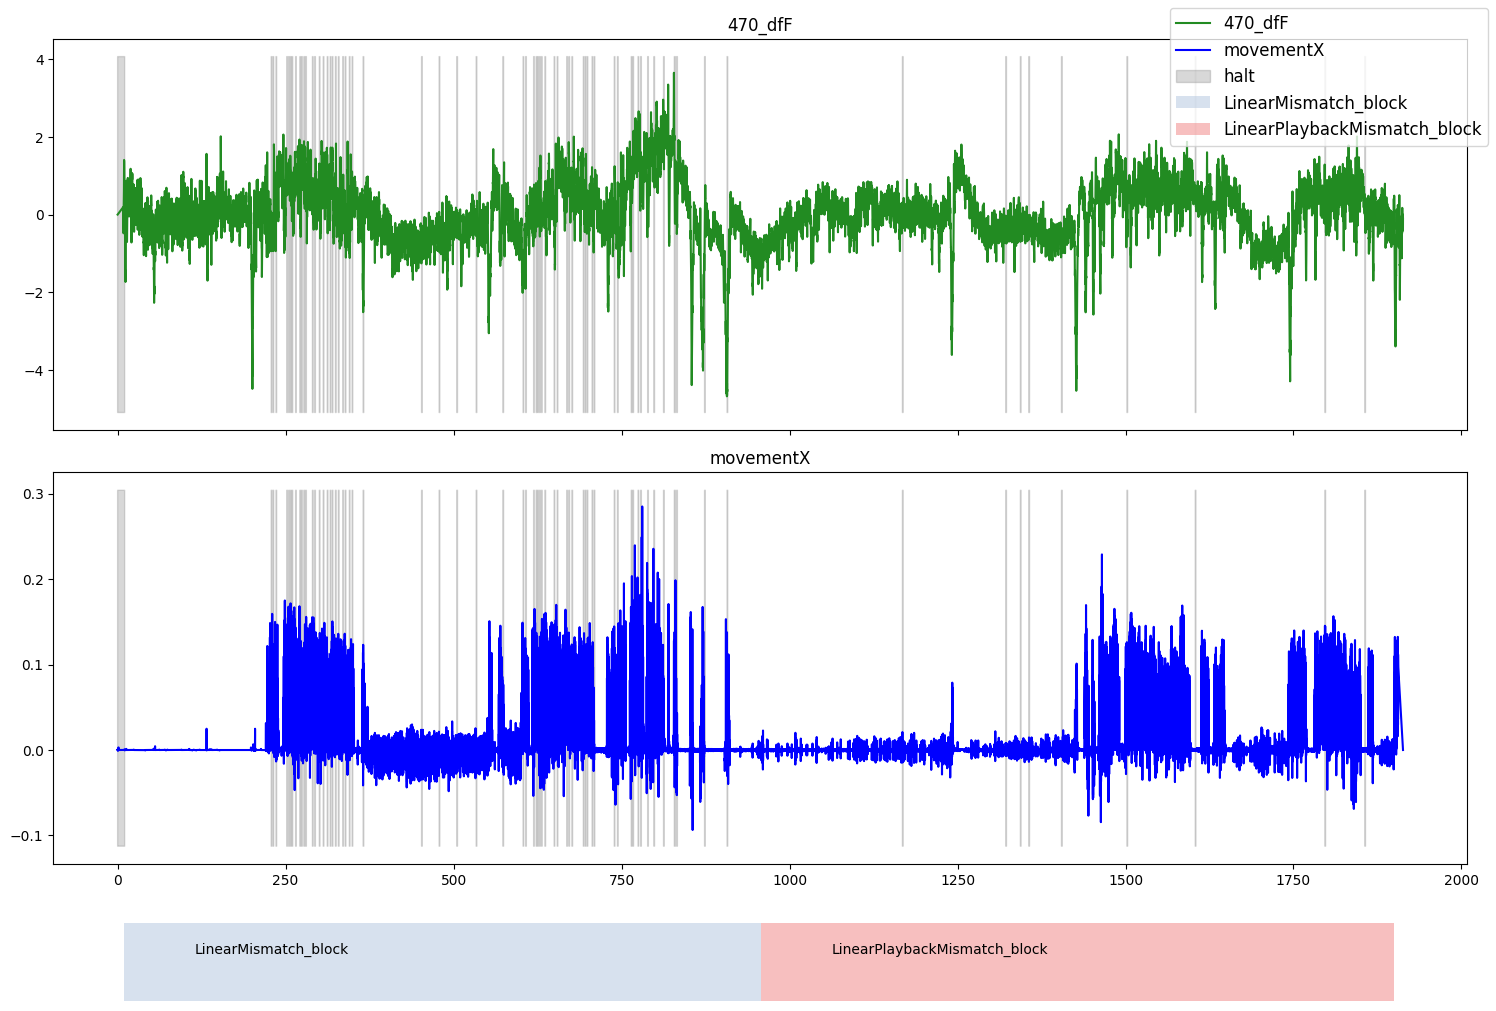

Plotted traces for B3M8


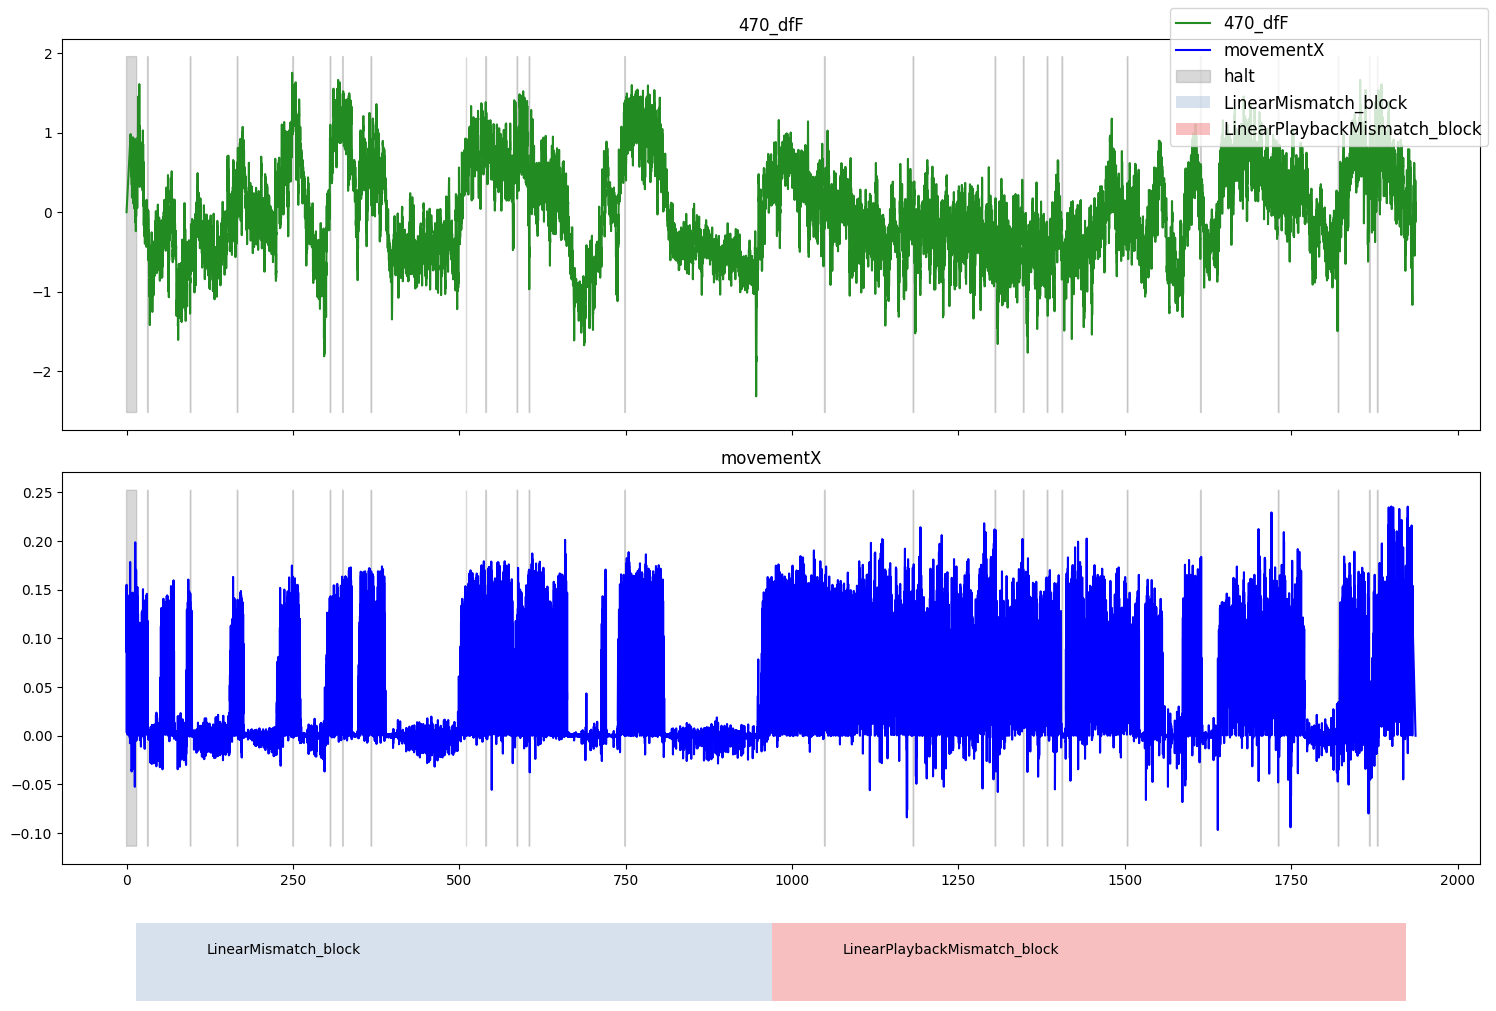

Plotted traces for B3M7


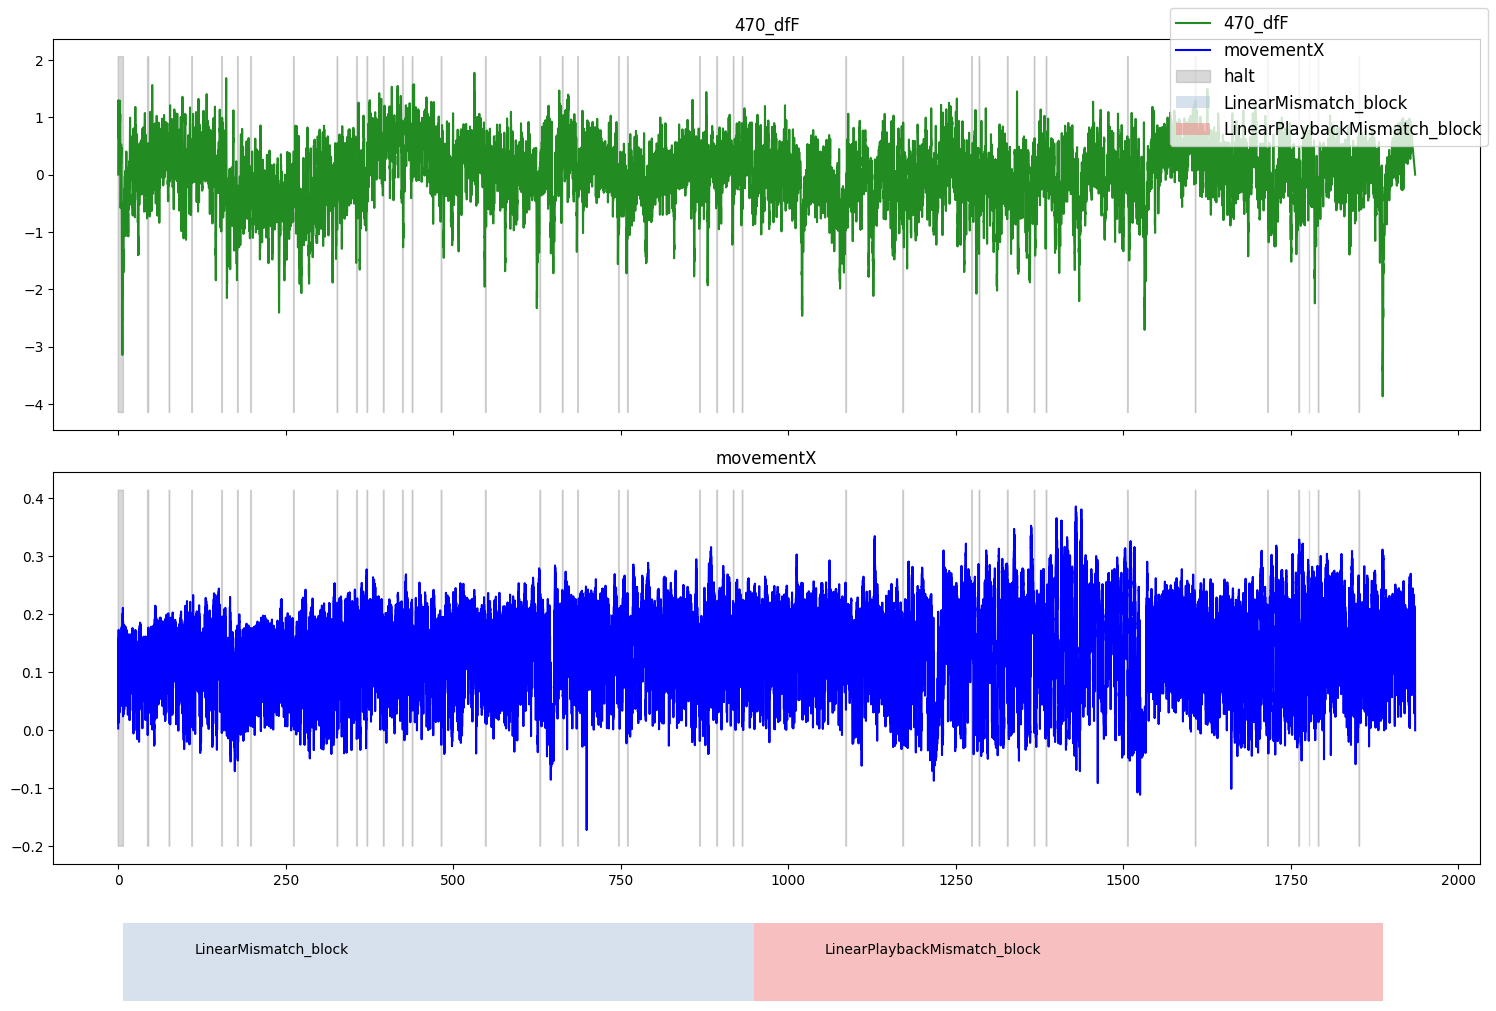

Plotted traces for B3M6


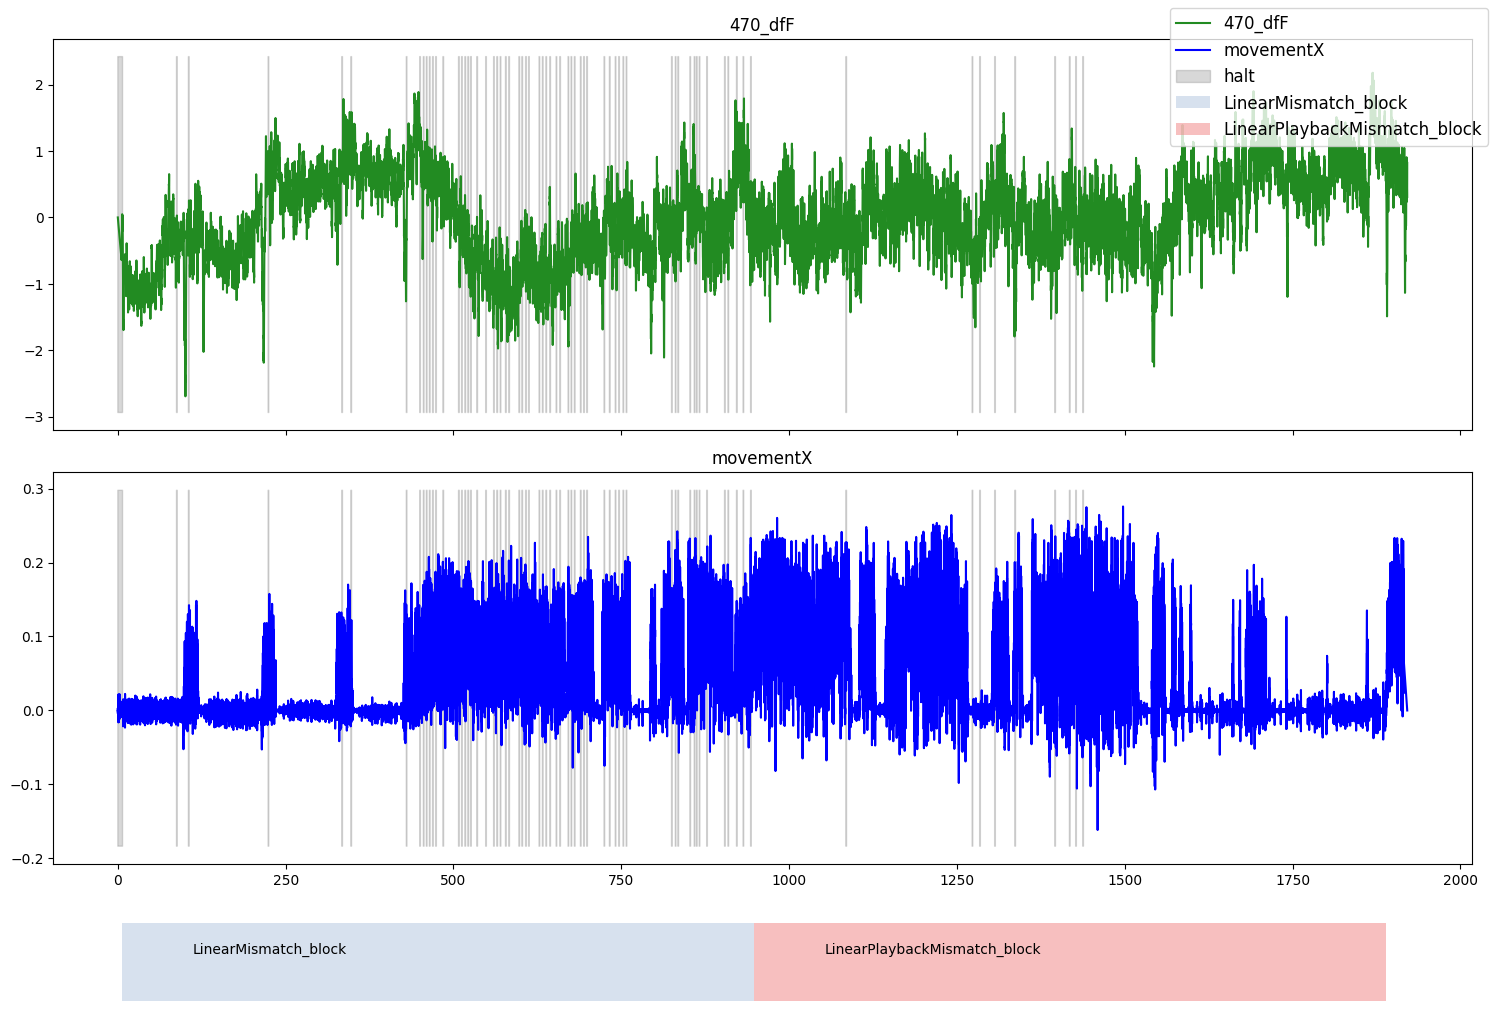

Plotted traces for B3M4


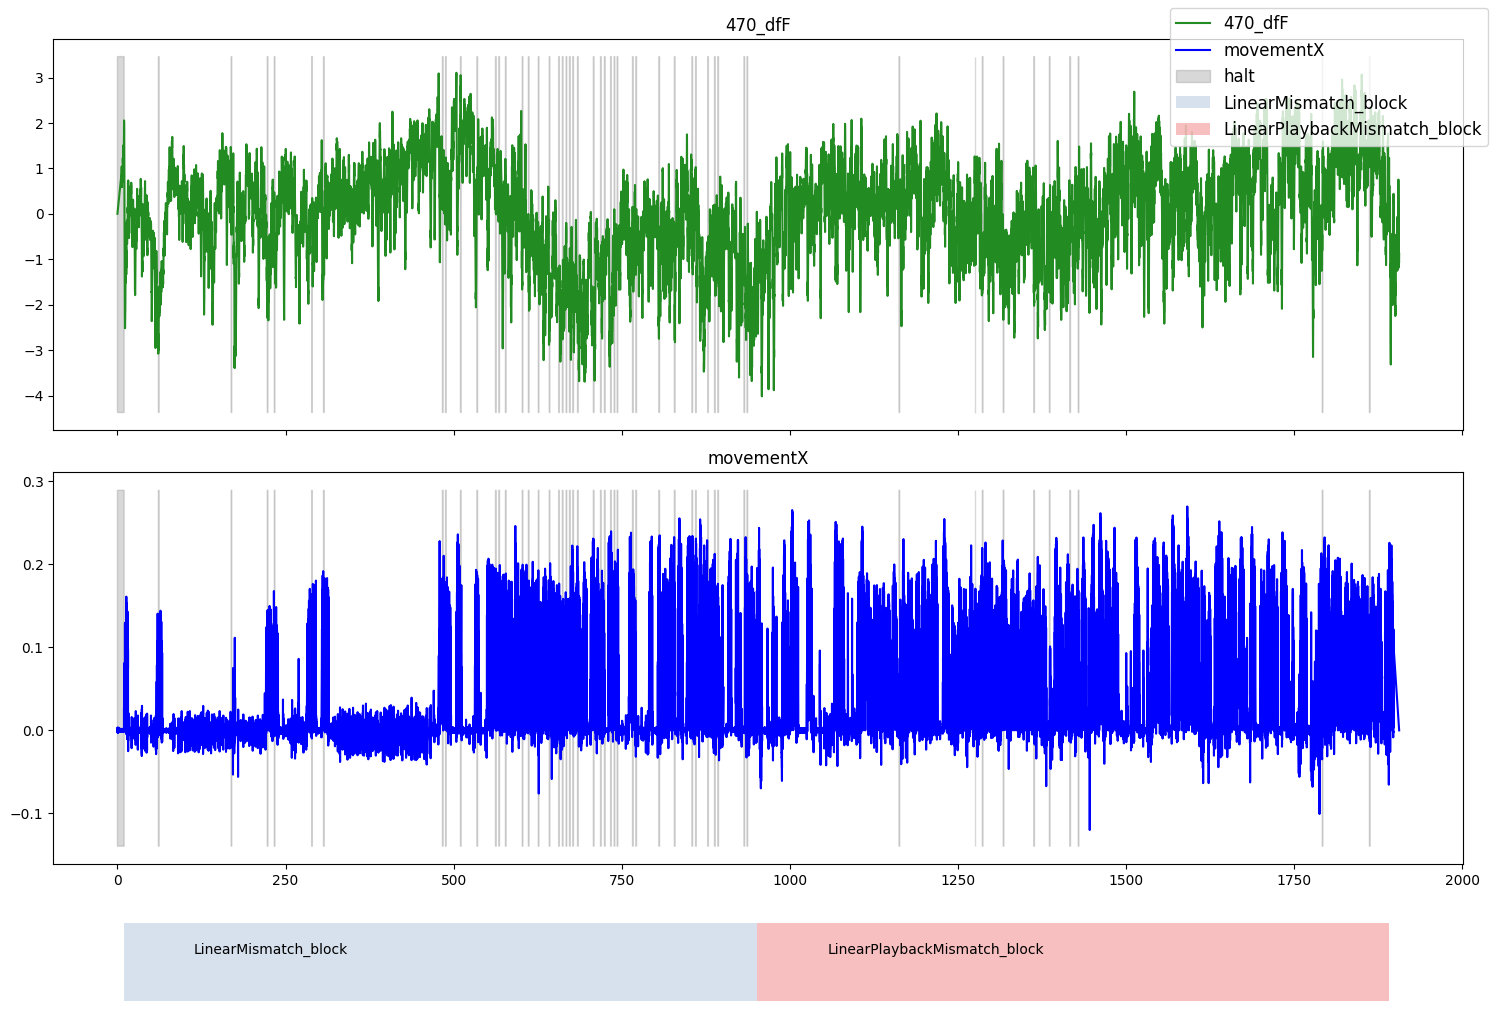

In [85]:
#pick a mouse
for mouse in Grab_MM_1.mouseID.unique():
    mouse_data = Grab_MM_1.loc[Grab_MM_1.mouseID == mouse]
    view_session_mouse(mouse_data, mouse)

In [64]:
#event_starts = (B2M6_Grab_MM_1['halt'] & ~B2M6_Grab_MM_1['halt'].shift(1, fill_value=True))  # Detect where True starts
#event_ends = (~B2M6_Grab_MM_1['halt'] & B2M6_Grab_MM_1['halt'].shift(1, fill_value=False))  # Detect where True ends

In [65]:
#event_starts.loc[event_starts == True]
#event_ends.loc[event_ends == True]

In [66]:
#Maybe fit a regression to see how much of the variation in fluorescence can be explained by running and block and so on
#Maybe also halt frequency, by randomly making blocks of a few seconds during which the halt frequency is calculated 
#(could be difficult, as two period blocks next to eachother could be sampled to low rate, while one could actually consider them high rate)
#Maybe theres a way to get a continous measure of rate

#look for different direction in correlation between running and fluorescence during the different blocks


31.883333333333333